<img src='https://s15.postimg.org/huiifx2mz/Copy_of_logo_with_white_background.png'>

<center>
# Classification
## A Brief Introduction
### By Ben Bowman

<par>
Last week we went over **Regression**, an effective technique for finding relationships between quantitative variables.  Typically, **Regression** is applied to problems where the value you want to predict is _quantitative_ and _continuous_.  However, in some problems, the value you want to predict is _categorical_.  

<par>
This week we will be going over **Classification**.  **Classification** problems occur when you are trying to _categorize_ objects given some known features about them.  For example, suppose that I am working on a political campaign to get Ms. America elected and have a bunch of voter demographics data.  I want to use machine learning methods to be able to predict a voter's political affiliation given their gender, age, level-of-education, and district.  Given a voter's gender, age, level-of-education and district, we would like to predict whether they are Democrat, Republican, or Independent/Other.   This problem is an excellent candidate (no-pun-intended) for **Classification** methods.  Here the feature vectors are $<$ Gender, age, level-of-education, district $>$ and the _classes_ are Democrat, Republican, and Independent/Other.  We want to use our voter demographics data, where we have the following information $<$ gender, age, level-of-education, district, *political-affiliation* $>$ for many individuals, as our training data to train a _classifier_ that can predict what political party a person identifies with given a feature vector for that person.  Note that in our training set, the political-affiliation of each member is _known_.  This is an example of _Supervised Learning_.

<img src='/files/Classification.jpg'>

### Other Examples of Classification Problems

* Email Spam Filters (Spam / Not-Spam)
* Medical Diagnosis (Sick / Not-Sick)
* Application Processing (Hire / Don't Hire)
* Handwriting Recognition( A-Z, 0-9)

### Applications
* Computer Vision
* Speech Recognition

# Let's get right to it 
Everyone download the data this link [Iris Dataset](http://archive.ics.uci.edu/ml/datasets/Iris)

In [24]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#make plots interactive within notebook
%matplotlib notebook

In [25]:
data = pd.read_csv('bezdekIris.data', names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class'])
data = data.iloc[np.random.permutation(len(data))] #Shuffle the data
data = data.reset_index(drop=True) #Reset the indices
data.head(10)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,6.4,3.1,5.5,1.8,Iris-virginica
1,7.2,3.0,5.8,1.6,Iris-virginica
2,5.9,3.0,4.2,1.5,Iris-versicolor
3,5.1,3.8,1.6,0.2,Iris-setosa
4,6.5,3.0,5.2,2.0,Iris-virginica
5,6.7,3.0,5.0,1.7,Iris-versicolor
6,6.9,3.1,4.9,1.5,Iris-versicolor
7,5.4,3.7,1.5,0.2,Iris-setosa
8,5.0,3.3,1.4,0.2,Iris-setosa
9,5.8,2.6,4.0,1.2,Iris-versicolor


# Exploring our Data

Let us first probe our data to see if any values are missing and get some descriptive statistics for each feature.

In [4]:
# Sepal Length
print 'Missing Sepal Length Values: ' + str(data['Sepal Length'].isnull().sum())
data['Sepal Length'].describe()

Missing Sepal Length Values: 0


count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: Sepal Length, dtype: float64

In [5]:
#Sepal Width
print 'Missing Sepal Width Values: ' + str(data['Sepal Width'].isnull().sum()) 
data['Sepal Width'].describe()

Missing Sepal Width Values: 0


count    150.000000
mean       3.057333
std        0.435866
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: Sepal Width, dtype: float64

In [6]:
#Petal Length
print 'Missing Petal Length Values: ' + str(data['Petal Length'].isnull().sum())
data['Petal Length'].describe()

Missing Petal Length Values: 0


count    150.000000
mean       3.758000
std        1.765298
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: Petal Length, dtype: float64

In [7]:
#Petal Width
print 'Missing Petal Width Values: ' + str(data['Petal Width'].isnull().sum())
data['Petal Width'].describe()

Missing Petal Width Values: 0


count    150.000000
mean       1.199333
std        0.762238
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: Petal Width, dtype: float64

We see that we have no values missing.  **_This almost never happens in practice_**.  Nonetheless, in this case, we can proceed without cleaning our data.

### Visualizing Our Data

Let's plot our data to see if we observe any patterns.  Since each flower has 4 attributes, (Sepal Length, Sepal Width, Petal Length, Petal Width), it will be difficult to visualize these features all on one plot.  Instead, let us choose three attributes at a time and plot the points in space, with each point colored by its class (Iris-setosa, Iris-versicolor, Iris-virginica).  The code below accomplishes this.  Change the parameters Xcolumn, Ycolumn, and Zcolumn, to pick what 3 attributes you use in your plot.  Play around.  _Do you see any patterns?_

<IPython.core.display.Javascript object>


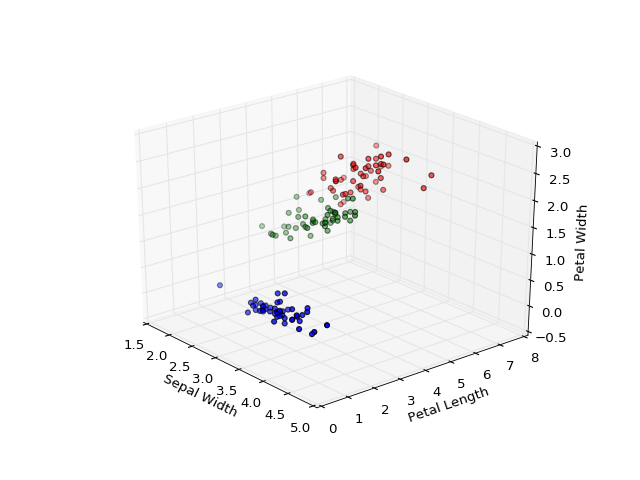

In [26]:
# Pick 3 attributes
Xcolumn = 'Sepal Width'
Ycolumn = 'Petal Length'
Zcolumn = 'Petal Width'

# Get a list of our classes Setosa, Versicolor, Virginica
classes = data.Class.unique()

# Pick colors for our classes
colormap = np.array(['r', 'g', 'b']) 

# Assign colors to each point depending on class
classColors = map(lambda x: np.where(classes==x)[0], data['Class'].values)

# Pull the attribute columns
X = data[Xcolumn]
Y = data[Ycolumn]
Z = data[Zcolumn]

# Create 3-d figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make a colored scatter-plot
ax.scatter(X.values, Y.values, Z.values, c=colormap[classColors])

# Set our labels
ax.set_xlabel(Xcolumn)
ax.set_ylabel(Ycolumn)
ax.set_zlabel(Zcolumn)

plt.show() # Show figure

It seems that the flower classes are fairly clustered in space in our graphs above.  This is exciting!  It means that we should be able to predict a flower's class given its attributes with considerable accuracy.  So let's try to create a classifier.

**_So what classification method do we use???_**

It seems from our plots that any of the classes can be (roughly) separated from the other two by a plane, i.e., each class is roughly [_linearly separable_](https://en.wikipedia.org/wiki/Linear_separability) from the other two.  Given this, we are going to target applying a **linear classifier**.

**_So what's a linear classifier?_**

Formally, linear classifiers are classifiers that make their classifications based on an output score, where the output score is a function of a linear combination of the attributes.

$$\text{Output Score} = y = f(\vec{w} \cdot \vec{x}) = f\left( \sum_j{w_j x_j} \right)$$

In this case the linear combination of the attributes is the dot product: $\vec{w} \cdot \vec{x} =  \sum_j{w_j x_j} $

I will not be diving into the mathematics of this in this tutorial (I have included links that do at the end).  What's important to know is that during the training stage, what we are doing is computing the weight vector $\vec{w}$.

### Let's Try an Example

The below example uses the logistic function from logistic regression to create a classifier.  Pick 2 attributes from the data set to build the model, then observe the plot.  The colored areas represent the predicted class of the classifier over that region.  Compare the classes of the actual data points to the predicted class for that region.  How do they stack up?  Try different combinations of attributes.  What do you see?

<IPython.core.display.Javascript object>


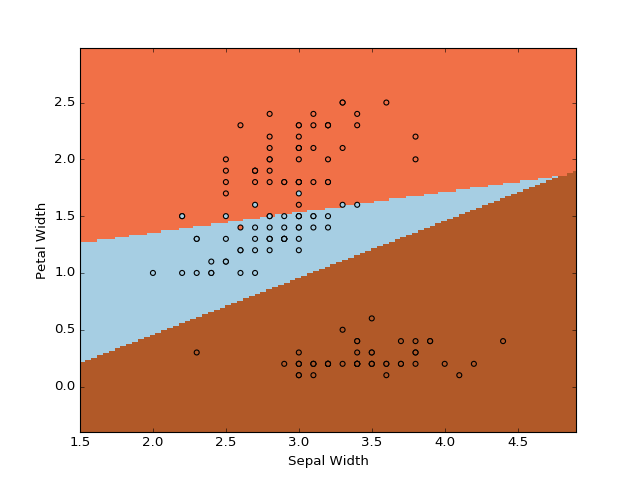

In [23]:
# Proceeding as in: http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html

# Pick 2 attributes to plot
Xcolumn = 'Sepal Width'
Ycolumn = 'Petal Width'

# Pull relevant data
atts = data[[Xcolumn, Ycolumn]]
classes = data.Class.unique()
targets = map(lambda x: np.where(classes==x)[0],data['Class']) # enumerate target classes

# Create model
logistic = linear_model.LogisticRegression()
logistic.fit(atts, targets) 

# Pull the attribute columns
X = data[Xcolumn].values
Y = data[Ycolumn].values

h = .02 # Step size for mesh

# Create mesh to plot decision boundary lines
x_min, x_max = X[:].min() - .5, X[:].max() + .5
y_min, y_max = Y[:].min() - .5, Y[:].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
bounds = logistic.predict(np.c_[xx.ravel(), yy.ravel()])

bounds = bounds.reshape(xx.shape)
plt.figure(1, figsize=(8,6))
plt.pcolormesh(xx, yy, bounds, cmap=plt.cm.Paired)

plt.scatter(X, Y, c=targets, edgecolors='k', cmap=plt.cm.Paired)
fig.suptitle('Decision Boundaries')
plt.xlabel(Xcolumn, fontsize=12)
plt.ylabel(Ycolumn, fontsize=12)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()